In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)


In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to C:\Users\USER/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\USER/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\USER/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [51]:
df = pd.read_csv("train.csv")
df["Title"] = df["Title"].fillna("")
df["Description"] = df["Description"].fillna("")
X = df['Title'].str.strip() + " " + df['Description'].str.strip()
Y = df["Class Index"]
print(X.head())

0    Wall St. Bears Claw Back Into the Black (Reute...
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2    Oil and Economy Cloud Stocks' Outlook (Reuters...
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
dtype: object


In [52]:
df_test = pd.read_csv("test.csv")
df_test["Title"] = df_test["Title"].fillna("")
df_test["Description"] = df_test["Description"].fillna("")
X_test = df_test['Title'].str.strip() + " " + df_test['Description'].str.strip()
Y_test = df_test["Class Index"]
print(X_test.head())

0    Fears for T N pension after talks Unions repre...
1    The Race is On: Second Private Team Sets Launc...
2    Ky. Company Wins Grant to Study Peptides (AP) ...
3    Prediction Unit Helps Forecast Wildfires (AP) ...
4    Calif. Aims to Limit Farm-Related Smog (AP) AP...
dtype: object


In [53]:
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk import pos_tag 

stop_words=set(stopwords.words("english")) 
lem = WordNetLemmatizer() 

def process_text(text: str): 
   text=text.lower() 
   tokens=word_tokenize(text) 
   pos_tags=pos_tag(tokens) 
   lem_tokens=[] 
   for word,pos in (pos_tags):
         if word not in stop_words: 
          wn_pos= get_wordnet_pos(pos) 
          lem_tokens.append(lem.lemmatize(word,wn_pos) )
   return " ".join(lem_tokens)

X=X.map(process_text) 
X_test=X_test.map(process_text)
print(X.head())
print(type(X))
print(type(X.iloc[0]))
print(X_test.head())
print(type(X_test))
print(type(X_test.iloc[0]))


0    wall st. bear claw back black ( reuters ) reut...
1    carlyle look toward commercial aerospace ( reu...
2    oil economy cloud stock ' outlook ( reuters ) ...
3    iraq halt oil export main southern pipeline ( ...
4    oil price soar all-time record , pose new mena...
dtype: object
<class 'pandas.core.series.Series'>
<class 'str'>
0    fear n pension talk union represent worker tur...
1    race : second private team set launch date hum...
2    ky. company win grant study peptide ( ap ) ap ...
3    prediction unit help forecast wildfire ( ap ) ...
4    calif. aim limit farm-related smog ( ap ) ap -...
dtype: object
<class 'pandas.core.series.Series'>
<class 'str'>


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Balanced choice for news titles+descriptions
vectorizer = TfidfVectorizer()
tfidf_train=vectorizer.fit_transform(X)
x_test=vectorizer.transform(X_test)

print("vocab size:", len(vectorizer.vocabulary_))
print("sample vocab (first 40):", list(vectorizer.vocabulary_.keys())[:40])
print(tfidf_train)
'''
tfidf_train=tfidf_train.toarray()
print(tfidf_train)'''

vocab size: 57389
sample vocab (first 40): ['wall', 'st', 'bear', 'claw', 'back', 'black', 'reuters', 'short', 'sellers', 'street', 'dwindling', 'band', 'ultra', 'cynics', 'see', 'green', 'carlyle', 'look', 'toward', 'commercial', 'aerospace', 'private', 'investment', 'firm', 'group', 'which', 'reputation', 'make', 'well', 'timed', 'occasionally', 'controversial', 'play', 'defense', 'industry', 'quietly', 'placed', 'its', 'bet', 'another']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2716821 stored elements and shape (120000, 57389)>
  Coords	Values
  (0, 55180)	0.34700084443334067
  (0, 48401)	0.17842317097299124
  (0, 6867)	0.20391731462432952
  (0, 11377)	0.28903659329150067
  (0, 6110)	0.13395460988987337
  (0, 7731)	0.19715834313127986
  (0, 43233)	0.20331361474553777
  (0, 46428)	0.18723400761643189
  (0, 45660)	0.34946489917507445
  (0, 49067)	0.1656229558567743
  (0, 16743)	0.34946489917507445
  (0, 6393)	0.2330209054080148
  (0, 52935)	0.2636798646260599
  (0,

'\ntfidf_train=tfidf_train.toarray()\nprint(tfidf_train)'

In [65]:
def one_hot_encode(y, num_classes):
    y = np.asarray(y, dtype=int)
    oh = np.zeros((y.shape[0], num_classes), dtype=float)
    oh[np.arange(y.shape[0]), y] = 1.0  # Subtract 1 for zero-based indexing
    return oh

yint = Y.values.astype(int)
y_hot = one_hot_encode(yint, 5)
y_labels=np.argmax(y_hot,axis=1)

yinttest = Y_test.values.astype(int)
y_hottest = one_hot_encode(yinttest, 5)
y_test=np.argmax(y_hottest,axis=1)

x_train, x_val, y_train, y_val = train_test_split(tfidf_train, y_labels, test_size=0.2, random_state=42)


print("x_train shape:", x_train.shape)
print("y_train shape:", y_train)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (96000, 57389)
y_train shape: [1 2 2 ... 2 4 4]
x_val shape: (24000, 57389)
y_val shape: (24000,)


Fitting LogisticRegression on sparse TF-IDF (this may take a bit)...


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Done.
Accuracy: 0.9149583333333333
Classification report:
               precision    recall  f1-score   support

           1     0.9285    0.9006    0.9143      5956
           2     0.9527    0.9809    0.9666      6058
           3     0.8821    0.8860    0.8840      5911
           4     0.8954    0.8915    0.8934      6075

    accuracy                         0.9150     24000
   macro avg     0.9147    0.9147    0.9146     24000
weighted avg     0.9148    0.9150    0.9148     24000



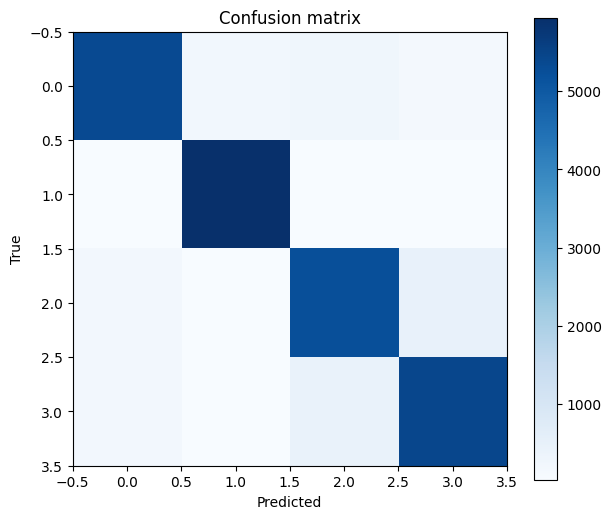

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

clf = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=1.0,
    max_iter=2000,
    multi_class='multinomial',   
    n_jobs=-1,
    class_weight=None          
)

print("Fitting LogisticRegression on sparse TF-IDF (this may take a bit)...")
clf.fit(x_train,y_train)
print("Done.")

y_pred = clf.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification report:\n", classification_report(y_val, y_pred, digits=4))
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Accuracy: 0.9125
Classification report:
               precision    recall  f1-score   support

           1     0.9281    0.9037    0.9157      1900
           2     0.9520    0.9816    0.9666      1900
           3     0.8787    0.8768    0.8778      1900
           4     0.8902    0.8879    0.8891      1900

    accuracy                         0.9125      7600
   macro avg     0.9123    0.9125    0.9123      7600
weighted avg     0.9123    0.9125    0.9123      7600



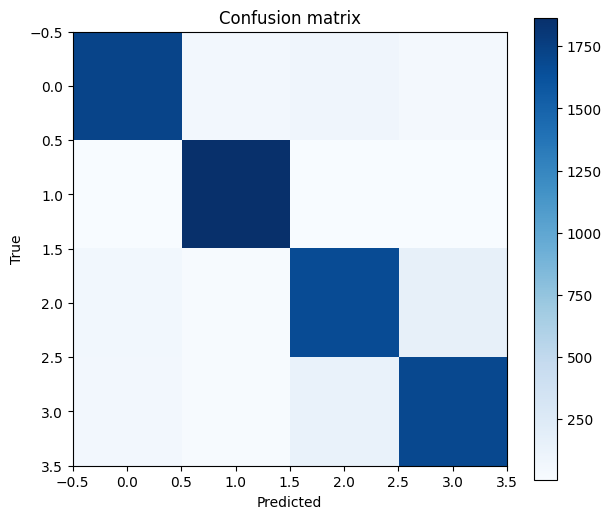

In [67]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import sys, nltk
print("Python exe:", sys.executable)
print("NLTK data paths:", nltk.data.path)


Python exe: c:\Users\USER\AppData\Local\Programs\Python\Python312\python.exe
NLTK data paths: ['C:\\Users\\USER/nltk_data', 'c:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\USER\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
